In [114]:
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [115]:
import PIL.Image as Image
from pathlib import Path

def load_image(file):
    img = Image.open(Db1_a+"\\"+file)
    return img



In [116]:
import os

Db1_a = r'.\data\Db1_a'


labels = list()
files = list()

# Loop door de bestanden in de map
for bestandsnaam in os.listdir(Db1_a):
    if bestandsnaam.endswith('.tif'):
        labels.append(bestandsnaam[:-6])
        files.append(bestandsnaam)

images = np.array([load_image(f) for f in files])

print(labels)

['100', '100', '100', '100', '100', '100', '100', '100', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '14', '14', '14', '15', '15', '15', '15', '15', '15', '15', '15', '16', '16', '16', '16', '16', '16', '16', '16', '17', '17', '17', '17', '17', '17', '17', '17', '18', '18', '18', '18', '18', '18', '18', '18', '19', '19', '19', '19', '19', '19', '19', '19', '1', '1', '1', '1', '1', '1', '1', '1', '20', '20', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21', '21', '21', '22', '22', '22', '22', '22', '22', '22', '22', '23', '23', '23', '23', '23', '23', '23', '23', '24', '24', '24', '24', '24', '24', '24', '24', '25', '25', '25', '25', '25', '25', '25', '25', '26', '26', '26', '26', '26', '26', '26', '26', '27', '27', '27', '27', '27', '27', '27', '27', '28', '28', '28', '28', '28', '28', '28

In [117]:
images_array = [np.array(image).flatten() for image in images]    

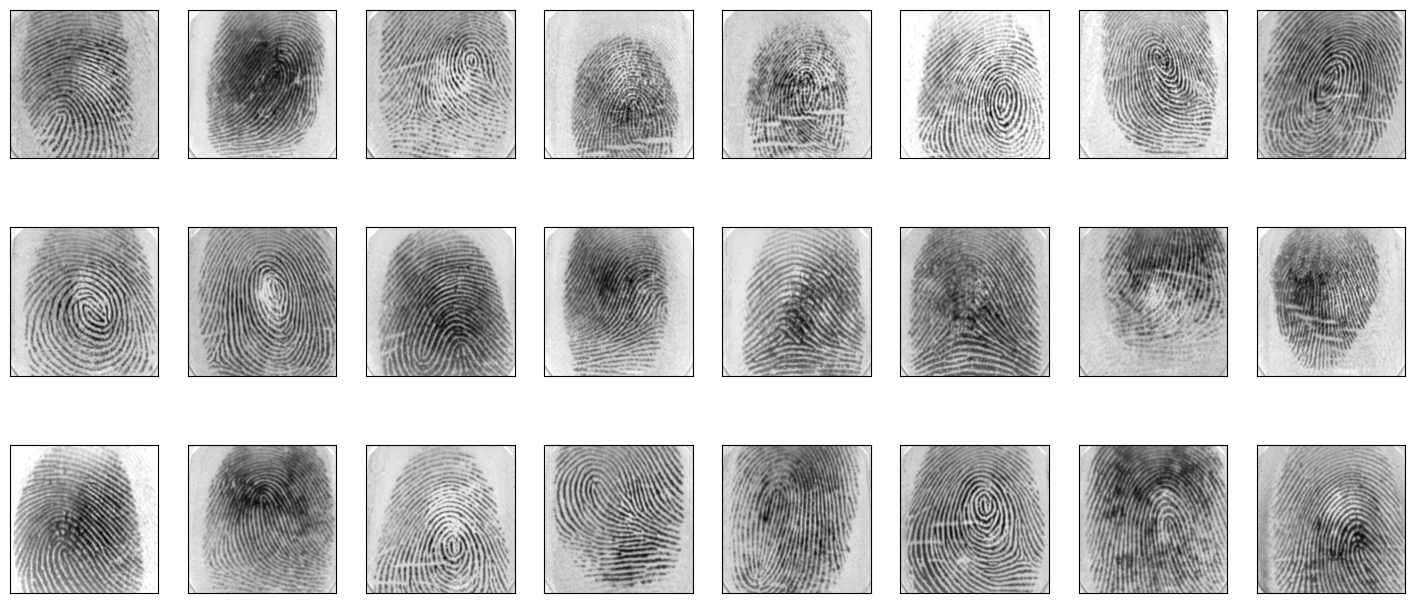

In [118]:
sample_size = 24


import copy
import math

plotimgs = copy.deepcopy(images)
np.random.shuffle(plotimgs)
rows = plotimgs[:sample_size]

_, subplots = plt.subplots(nrows = math.ceil(sample_size/8), ncols = 8, figsize=(18, int(sample_size/3)))
subplots = subplots.flatten()
for i, x in enumerate(rows):
    subplots[i].imshow(x, cmap='gray')
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_array, labels, test_size=.3, random_state=0)

In [120]:
import random

X_train = []
X_test = []
y_train = []
y_test = []

random_number = random.randint(0, 7)

for i, x in enumerate(labels):
    if(i % 8 != random_number):
        X_train.append(images_array[i])
        y_train.append(labels[i])
    else:
        X_test.append(images_array[i])
        y_test.append(labels[i])
    
    if(i % 8 == 7):
        random_number = random.randint(0, 7)

In [121]:
from sklearn.svm import SVC


model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
print("Accuracy:", acc)

Accuracy: 0.28


In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)  # Je kunt het aantal bomen (n_estimators) aanpassen
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
print("Accuracy:", acc)


Accuracy: 0.34
